In [1]:
import torch
import gymnasium as gym
import toy_envs

In [2]:
model = torch.load('ckpts/MultiGoal-v0/sql/standard/7-(seed0)/actor.pt')
# model.eval()

/home/chienfeng/anaconda3/envs/sql/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/chienfeng/anaconda3/envs/sql/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/chienfeng/anaconda3/envs/sql/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/chienfeng/anaconda3/envs/sql/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not with

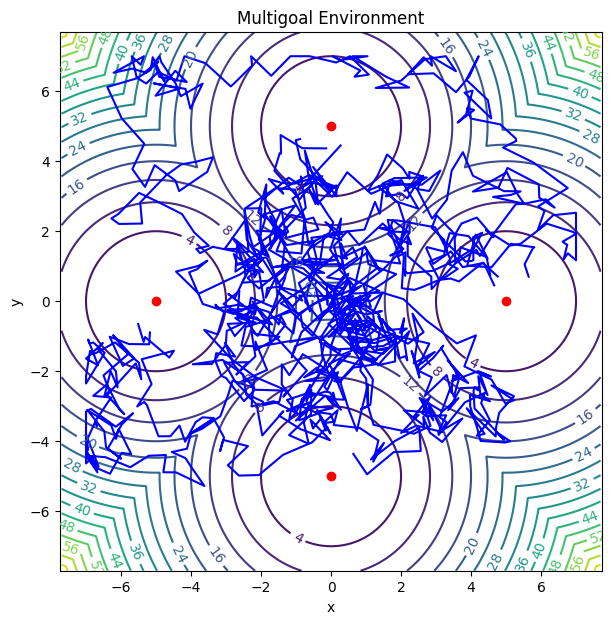

In [3]:
paths = []
env = gym.make('MultiGoal-v0', init_sigma=0.1)
for i in range(10):
    s, info = env.reset(seed=i)
    path = []
    path += [info['pos']]
    done = False
    while not done:
        a = model(obs=s[None, :])
        a = a.cpu().detach().numpy()
        s_, r, done, truncate, info = env.step(a)
        done |= truncate
        path += [info['pos']]
        s = s_
    paths += [path]

# print(path)
env.render_rollouts(paths)